# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

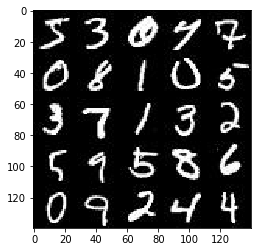

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

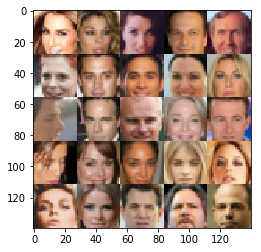

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


C:\Users\Bahareh\Anaconda3\envs\dog\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "input_real")
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), "input_z")
    learning_rate = tf.placeholder(tf.float32, name="lr")

    return real_inputs, z_inputs, learning_rate

   


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    keep_prob = 0.9

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    keep_prob = 0.9
    
    with tf.variable_scope('generator', reuse=not is_train):
        g1 = tf.layers.dense(z, 7*7*512)
        g1 = tf.reshape(g1, (-1, 7, 7, 512))
        g1 = tf.layers.batch_normalization(g1, training=is_train)
        g1 = tf.maximum(alpha * g1, g1)
        # shape = 7x7x512
        
        g2 = tf.layers.conv2d_transpose(g1, 256, 5, strides=2, padding='same', activation=None)
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = tf.maximum(alpha * g2, g2)
        g2 = tf.nn.dropout(g2, keep_prob=keep_prob)
        # shape = 14x14x256
        
        g3 = tf.layers.conv2d_transpose(g2, 128, 5, strides=2, padding='same', activation=None)
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = tf.maximum(alpha * g3, g3)   
        g3 = tf.nn.dropout(g3, keep_prob=keep_prob)
        # shape = 28x28x128
        
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        # shape = 28x28x5
        
        out = tf.tanh(logits)
        
        return out

    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_output = generator(input_z, out_channel_dim)
    disc_output_real, disc_logits_real = discriminator(input_real)
    disc_output_fake, disc_logits_fake = discriminator(g_output, reuse=True)
    
    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_real,
            labels = tf.ones_like(disc_output_real) * (1 - smooth)
        )
    )
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_fake,
            labels = tf.zeros_like(disc_output_fake)
        )
    )
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_fake,
            labels = tf.ones_like(disc_output_fake)
        )
    )
    
    disc_loss = disc_loss_real + disc_loss_fake
    return disc_loss, gen_loss

    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    disc_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)

        return disc_train_opt, gen_train_opt

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [33]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


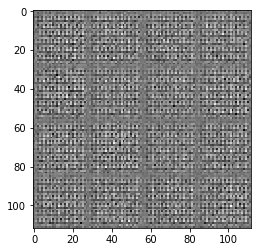

Epoch 1/2... Generator Loss: 3.7513 Discriminator Loss: 0.3953...
Epoch 1/2... Generator Loss: 3.3871 Discriminator Loss: 0.6495...
Epoch 1/2... Generator Loss: 4.0937 Discriminator Loss: 0.3655...
Epoch 1/2... Generator Loss: 0.8585 Discriminator Loss: 1.1025...
Epoch 1/2... Generator Loss: 4.7808 Discriminator Loss: 0.3637...
Epoch 1/2... Generator Loss: 3.8114 Discriminator Loss: 0.9819...
Epoch 1/2... Generator Loss: 5.5851 Discriminator Loss: 0.5078...
Epoch 1/2... Generator Loss: 1.0814 Discriminator Loss: 1.9380...
Epoch 1/2... Generator Loss: 2.6609 Discriminator Loss: 0.8086...
Epoch 1/2... Generator Loss: 2.0466 Discriminator Loss: 0.7234...


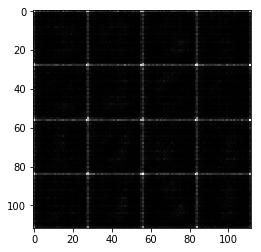

Epoch 1/2... Generator Loss: 1.9417 Discriminator Loss: 1.3827...
Epoch 1/2... Generator Loss: 1.3760 Discriminator Loss: 0.9869...
Epoch 1/2... Generator Loss: 0.8108 Discriminator Loss: 1.2677...
Epoch 1/2... Generator Loss: 0.6070 Discriminator Loss: 1.3332...
Epoch 1/2... Generator Loss: 1.1169 Discriminator Loss: 1.2669...
Epoch 1/2... Generator Loss: 1.6696 Discriminator Loss: 1.2792...
Epoch 1/2... Generator Loss: 1.0183 Discriminator Loss: 1.1819...
Epoch 1/2... Generator Loss: 1.0624 Discriminator Loss: 1.1164...
Epoch 1/2... Generator Loss: 1.3955 Discriminator Loss: 1.0104...
Epoch 1/2... Generator Loss: 1.4012 Discriminator Loss: 0.9970...


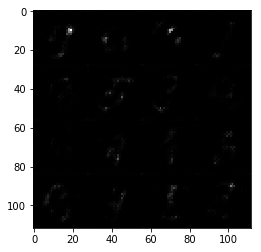

Epoch 1/2... Generator Loss: 1.6564 Discriminator Loss: 1.1499...
Epoch 1/2... Generator Loss: 2.1398 Discriminator Loss: 1.2545...
Epoch 1/2... Generator Loss: 0.9835 Discriminator Loss: 1.1170...
Epoch 1/2... Generator Loss: 1.0440 Discriminator Loss: 1.0032...
Epoch 1/2... Generator Loss: 1.7896 Discriminator Loss: 0.9794...
Epoch 1/2... Generator Loss: 2.3209 Discriminator Loss: 1.1241...
Epoch 1/2... Generator Loss: 1.7779 Discriminator Loss: 0.8998...
Epoch 1/2... Generator Loss: 1.3702 Discriminator Loss: 0.9806...
Epoch 1/2... Generator Loss: 1.5651 Discriminator Loss: 0.8769...
Epoch 1/2... Generator Loss: 1.2438 Discriminator Loss: 0.9360...


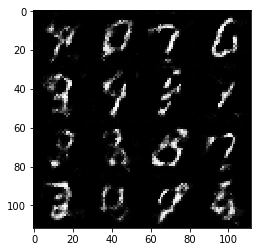

Epoch 1/2... Generator Loss: 0.3702 Discriminator Loss: 1.6921...
Epoch 1/2... Generator Loss: 1.5916 Discriminator Loss: 0.9591...
Epoch 1/2... Generator Loss: 1.9808 Discriminator Loss: 1.2456...
Epoch 1/2... Generator Loss: 1.3631 Discriminator Loss: 1.1453...
Epoch 1/2... Generator Loss: 2.5101 Discriminator Loss: 1.4328...
Epoch 1/2... Generator Loss: 0.9627 Discriminator Loss: 1.0466...
Epoch 1/2... Generator Loss: 1.7664 Discriminator Loss: 1.0367...
Epoch 1/2... Generator Loss: 1.2388 Discriminator Loss: 1.0282...
Epoch 1/2... Generator Loss: 0.6959 Discriminator Loss: 1.2417...
Epoch 1/2... Generator Loss: 1.9459 Discriminator Loss: 1.1203...


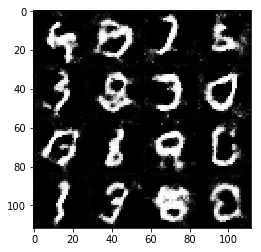

Epoch 1/2... Generator Loss: 2.2940 Discriminator Loss: 1.3201...
Epoch 1/2... Generator Loss: 1.0649 Discriminator Loss: 0.9698...
Epoch 1/2... Generator Loss: 1.6430 Discriminator Loss: 1.0806...
Epoch 1/2... Generator Loss: 1.1934 Discriminator Loss: 1.0652...
Epoch 1/2... Generator Loss: 1.5551 Discriminator Loss: 1.1395...
Epoch 1/2... Generator Loss: 1.2230 Discriminator Loss: 1.1052...
Epoch 2/2... Generator Loss: 1.3124 Discriminator Loss: 1.1151...
Epoch 2/2... Generator Loss: 1.1140 Discriminator Loss: 1.0345...
Epoch 2/2... Generator Loss: 1.1894 Discriminator Loss: 1.1073...
Epoch 2/2... Generator Loss: 0.9663 Discriminator Loss: 1.1771...


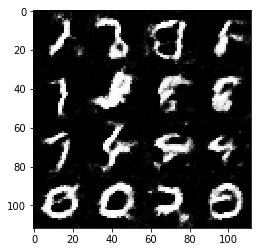

Epoch 2/2... Generator Loss: 1.2598 Discriminator Loss: 0.9331...
Epoch 2/2... Generator Loss: 0.7075 Discriminator Loss: 1.2610...
Epoch 2/2... Generator Loss: 1.0298 Discriminator Loss: 1.1114...
Epoch 2/2... Generator Loss: 0.6019 Discriminator Loss: 1.3307...
Epoch 2/2... Generator Loss: 1.6672 Discriminator Loss: 1.1804...
Epoch 2/2... Generator Loss: 1.1262 Discriminator Loss: 1.0609...
Epoch 2/2... Generator Loss: 0.8843 Discriminator Loss: 1.1041...
Epoch 2/2... Generator Loss: 1.4393 Discriminator Loss: 0.9915...
Epoch 2/2... Generator Loss: 0.8744 Discriminator Loss: 1.1788...
Epoch 2/2... Generator Loss: 0.9723 Discriminator Loss: 1.0536...


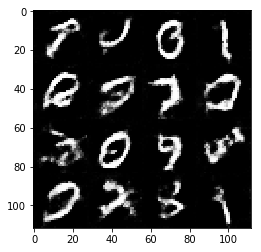

Epoch 2/2... Generator Loss: 1.1234 Discriminator Loss: 1.0330...
Epoch 2/2... Generator Loss: 1.2860 Discriminator Loss: 1.0990...
Epoch 2/2... Generator Loss: 2.2299 Discriminator Loss: 1.2882...
Epoch 2/2... Generator Loss: 0.9654 Discriminator Loss: 1.0889...
Epoch 2/2... Generator Loss: 1.1629 Discriminator Loss: 1.0389...
Epoch 2/2... Generator Loss: 0.6225 Discriminator Loss: 1.3395...
Epoch 2/2... Generator Loss: 1.0298 Discriminator Loss: 1.0349...
Epoch 2/2... Generator Loss: 1.0415 Discriminator Loss: 1.0544...
Epoch 2/2... Generator Loss: 1.4988 Discriminator Loss: 0.9651...
Epoch 2/2... Generator Loss: 1.2779 Discriminator Loss: 1.0757...


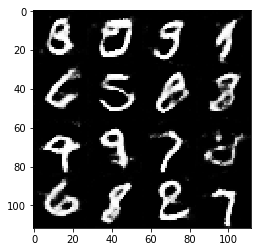

Epoch 2/2... Generator Loss: 1.0865 Discriminator Loss: 1.0728...
Epoch 2/2... Generator Loss: 1.5458 Discriminator Loss: 0.9832...
Epoch 2/2... Generator Loss: 1.2015 Discriminator Loss: 1.1119...
Epoch 2/2... Generator Loss: 0.8051 Discriminator Loss: 1.1569...
Epoch 2/2... Generator Loss: 1.1054 Discriminator Loss: 1.1271...
Epoch 2/2... Generator Loss: 1.3383 Discriminator Loss: 1.0016...
Epoch 2/2... Generator Loss: 0.8062 Discriminator Loss: 1.1165...
Epoch 2/2... Generator Loss: 1.3402 Discriminator Loss: 1.1271...
Epoch 2/2... Generator Loss: 1.2516 Discriminator Loss: 0.9941...
Epoch 2/2... Generator Loss: 0.7877 Discriminator Loss: 1.1419...


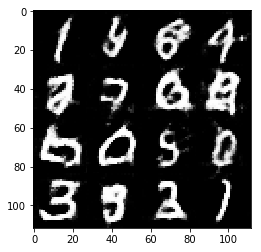

Epoch 2/2... Generator Loss: 0.8592 Discriminator Loss: 1.1128...
Epoch 2/2... Generator Loss: 1.3833 Discriminator Loss: 1.1053...
Epoch 2/2... Generator Loss: 0.9366 Discriminator Loss: 1.0315...
Epoch 2/2... Generator Loss: 1.3993 Discriminator Loss: 0.9126...
Epoch 2/2... Generator Loss: 0.9024 Discriminator Loss: 1.0653...
Epoch 2/2... Generator Loss: 1.0328 Discriminator Loss: 1.0590...
Epoch 2/2... Generator Loss: 1.2537 Discriminator Loss: 1.0613...
Epoch 2/2... Generator Loss: 1.4817 Discriminator Loss: 1.0337...
Epoch 2/2... Generator Loss: 1.4778 Discriminator Loss: 0.9822...
Epoch 2/2... Generator Loss: 2.1382 Discriminator Loss: 1.2047...


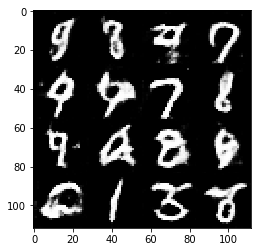

Epoch 2/2... Generator Loss: 0.8838 Discriminator Loss: 1.1004...
Epoch 2/2... Generator Loss: 1.3836 Discriminator Loss: 0.9885...
Epoch 2/2... Generator Loss: 1.3424 Discriminator Loss: 1.0054...


In [35]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


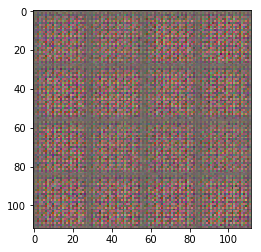

Epoch 1/1... Generator Loss: 1.5797 Discriminator Loss: 0.7169...
Epoch 1/1... Generator Loss: 5.3617 Discriminator Loss: 0.3836...
Epoch 1/1... Generator Loss: 4.1497 Discriminator Loss: 0.4913...
Epoch 1/1... Generator Loss: 5.5736 Discriminator Loss: 2.1778...
Epoch 1/1... Generator Loss: 0.5064 Discriminator Loss: 1.6142...
Epoch 1/1... Generator Loss: 1.0478 Discriminator Loss: 0.9863...
Epoch 1/1... Generator Loss: 3.0667 Discriminator Loss: 0.5087...
Epoch 1/1... Generator Loss: 1.9926 Discriminator Loss: 0.5930...
Epoch 1/1... Generator Loss: 2.7033 Discriminator Loss: 0.4824...
Epoch 1/1... Generator Loss: 1.7443 Discriminator Loss: 0.7439...


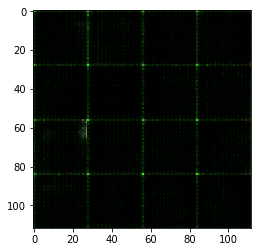

Epoch 1/1... Generator Loss: 1.2562 Discriminator Loss: 0.8171...
Epoch 1/1... Generator Loss: 1.2667 Discriminator Loss: 0.8230...
Epoch 1/1... Generator Loss: 1.2162 Discriminator Loss: 0.9463...
Epoch 1/1... Generator Loss: 2.7498 Discriminator Loss: 1.2725...
Epoch 1/1... Generator Loss: 1.2225 Discriminator Loss: 1.0842...
Epoch 1/1... Generator Loss: 0.9007 Discriminator Loss: 1.2337...
Epoch 1/1... Generator Loss: 0.6661 Discriminator Loss: 1.1892...
Epoch 1/1... Generator Loss: 1.3166 Discriminator Loss: 0.9887...
Epoch 1/1... Generator Loss: 0.8311 Discriminator Loss: 1.1401...
Epoch 1/1... Generator Loss: 1.2530 Discriminator Loss: 0.8219...


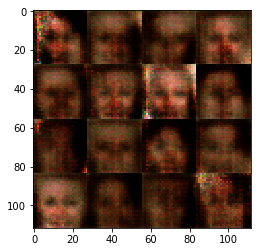

Epoch 1/1... Generator Loss: 0.6713 Discriminator Loss: 1.2457...
Epoch 1/1... Generator Loss: 1.7689 Discriminator Loss: 0.8935...
Epoch 1/1... Generator Loss: 1.3365 Discriminator Loss: 0.9910...
Epoch 1/1... Generator Loss: 0.1163 Discriminator Loss: 3.0579...
Epoch 1/1... Generator Loss: 1.0404 Discriminator Loss: 0.9757...
Epoch 1/1... Generator Loss: 1.5326 Discriminator Loss: 1.1294...
Epoch 1/1... Generator Loss: 1.1901 Discriminator Loss: 0.9716...
Epoch 1/1... Generator Loss: 1.0802 Discriminator Loss: 1.0143...
Epoch 1/1... Generator Loss: 0.4911 Discriminator Loss: 1.4725...
Epoch 1/1... Generator Loss: 1.5420 Discriminator Loss: 0.9560...


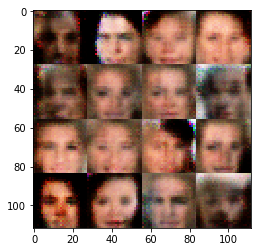

Epoch 1/1... Generator Loss: 1.1159 Discriminator Loss: 1.0385...
Epoch 1/1... Generator Loss: 1.0784 Discriminator Loss: 1.0352...
Epoch 1/1... Generator Loss: 1.6931 Discriminator Loss: 1.3301...
Epoch 1/1... Generator Loss: 1.3093 Discriminator Loss: 1.2347...
Epoch 1/1... Generator Loss: 2.7697 Discriminator Loss: 2.0439...
Epoch 1/1... Generator Loss: 0.3452 Discriminator Loss: 1.8742...
Epoch 1/1... Generator Loss: 0.5694 Discriminator Loss: 1.3750...
Epoch 1/1... Generator Loss: 0.7521 Discriminator Loss: 1.1622...
Epoch 1/1... Generator Loss: 1.9045 Discriminator Loss: 1.0740...
Epoch 1/1... Generator Loss: 1.0517 Discriminator Loss: 0.9451...


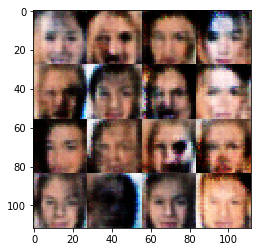

Epoch 1/1... Generator Loss: 2.9491 Discriminator Loss: 1.7836...
Epoch 1/1... Generator Loss: 0.9767 Discriminator Loss: 1.1182...
Epoch 1/1... Generator Loss: 1.2591 Discriminator Loss: 1.2325...
Epoch 1/1... Generator Loss: 2.1103 Discriminator Loss: 1.6538...
Epoch 1/1... Generator Loss: 0.4496 Discriminator Loss: 1.4798...
Epoch 1/1... Generator Loss: 2.3175 Discriminator Loss: 1.0388...
Epoch 1/1... Generator Loss: 1.4016 Discriminator Loss: 0.9398...
Epoch 1/1... Generator Loss: 1.0249 Discriminator Loss: 1.1900...
Epoch 1/1... Generator Loss: 0.9325 Discriminator Loss: 1.0471...
Epoch 1/1... Generator Loss: 1.9497 Discriminator Loss: 1.2466...


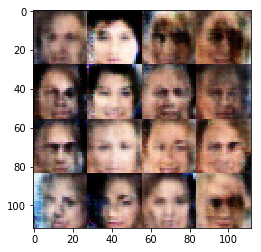

Epoch 1/1... Generator Loss: 1.0297 Discriminator Loss: 1.1136...
Epoch 1/1... Generator Loss: 0.9857 Discriminator Loss: 1.1397...
Epoch 1/1... Generator Loss: 1.8833 Discriminator Loss: 1.4766...
Epoch 1/1... Generator Loss: 0.3592 Discriminator Loss: 1.6588...
Epoch 1/1... Generator Loss: 0.8745 Discriminator Loss: 1.0948...
Epoch 1/1... Generator Loss: 1.0291 Discriminator Loss: 1.1831...
Epoch 1/1... Generator Loss: 0.4444 Discriminator Loss: 1.4848...
Epoch 1/1... Generator Loss: 2.3895 Discriminator Loss: 1.5344...
Epoch 1/1... Generator Loss: 1.0633 Discriminator Loss: 1.2408...
Epoch 1/1... Generator Loss: 1.2329 Discriminator Loss: 1.1795...


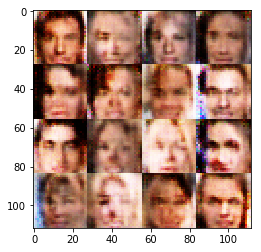

Epoch 1/1... Generator Loss: 0.6649 Discriminator Loss: 1.4445...
Epoch 1/1... Generator Loss: 0.5280 Discriminator Loss: 1.4169...
Epoch 1/1... Generator Loss: 1.0384 Discriminator Loss: 1.1652...
Epoch 1/1... Generator Loss: 0.7190 Discriminator Loss: 1.4533...
Epoch 1/1... Generator Loss: 1.8597 Discriminator Loss: 1.2820...
Epoch 1/1... Generator Loss: 1.2688 Discriminator Loss: 1.1367...
Epoch 1/1... Generator Loss: 1.1451 Discriminator Loss: 0.8689...
Epoch 1/1... Generator Loss: 0.6910 Discriminator Loss: 1.4561...
Epoch 1/1... Generator Loss: 0.4829 Discriminator Loss: 1.6048...
Epoch 1/1... Generator Loss: 0.8357 Discriminator Loss: 1.3415...


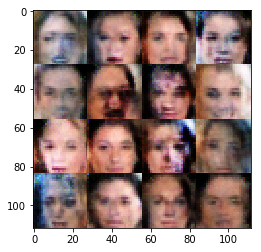

Epoch 1/1... Generator Loss: 1.2205 Discriminator Loss: 1.1849...
Epoch 1/1... Generator Loss: 1.1243 Discriminator Loss: 1.3328...
Epoch 1/1... Generator Loss: 0.1546 Discriminator Loss: 2.5398...
Epoch 1/1... Generator Loss: 1.1030 Discriminator Loss: 1.1039...
Epoch 1/1... Generator Loss: 0.8838 Discriminator Loss: 1.4119...
Epoch 1/1... Generator Loss: 0.8162 Discriminator Loss: 1.2748...
Epoch 1/1... Generator Loss: 1.0743 Discriminator Loss: 1.2378...
Epoch 1/1... Generator Loss: 0.8408 Discriminator Loss: 1.2142...
Epoch 1/1... Generator Loss: 1.0172 Discriminator Loss: 1.3508...
Epoch 1/1... Generator Loss: 1.1956 Discriminator Loss: 1.1909...


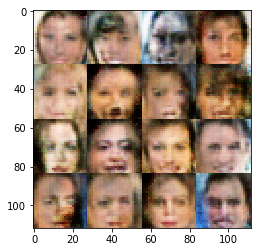

Epoch 1/1... Generator Loss: 0.7945 Discriminator Loss: 1.3779...
Epoch 1/1... Generator Loss: 0.6205 Discriminator Loss: 1.4330...
Epoch 1/1... Generator Loss: 0.5238 Discriminator Loss: 1.3925...
Epoch 1/1... Generator Loss: 1.0101 Discriminator Loss: 1.2496...
Epoch 1/1... Generator Loss: 0.8434 Discriminator Loss: 1.2896...
Epoch 1/1... Generator Loss: 1.1013 Discriminator Loss: 1.2229...
Epoch 1/1... Generator Loss: 0.7356 Discriminator Loss: 1.3363...
Epoch 1/1... Generator Loss: 0.5998 Discriminator Loss: 1.4224...
Epoch 1/1... Generator Loss: 0.8520 Discriminator Loss: 1.3504...
Epoch 1/1... Generator Loss: 0.8598 Discriminator Loss: 1.3572...


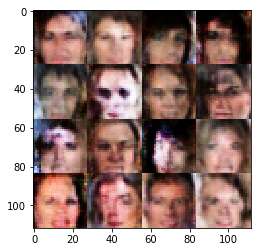

Epoch 1/1... Generator Loss: 0.9226 Discriminator Loss: 1.1834...
Epoch 1/1... Generator Loss: 0.6676 Discriminator Loss: 1.4993...
Epoch 1/1... Generator Loss: 0.7306 Discriminator Loss: 1.2341...
Epoch 1/1... Generator Loss: 1.2248 Discriminator Loss: 1.2380...
Epoch 1/1... Generator Loss: 0.9965 Discriminator Loss: 1.1567...
Epoch 1/1... Generator Loss: 0.5585 Discriminator Loss: 1.6000...
Epoch 1/1... Generator Loss: 0.9905 Discriminator Loss: 1.2530...
Epoch 1/1... Generator Loss: 0.6397 Discriminator Loss: 1.3369...
Epoch 1/1... Generator Loss: 0.9704 Discriminator Loss: 1.3879...
Epoch 1/1... Generator Loss: 1.1532 Discriminator Loss: 1.3936...


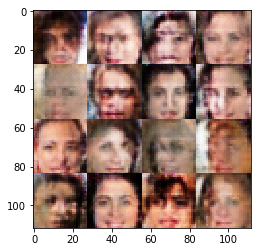

Epoch 1/1... Generator Loss: 1.1416 Discriminator Loss: 1.1783...
Epoch 1/1... Generator Loss: 0.9848 Discriminator Loss: 1.3007...
Epoch 1/1... Generator Loss: 0.5203 Discriminator Loss: 1.5016...
Epoch 1/1... Generator Loss: 0.8398 Discriminator Loss: 1.2226...
Epoch 1/1... Generator Loss: 0.7021 Discriminator Loss: 1.3434...
Epoch 1/1... Generator Loss: 0.8732 Discriminator Loss: 1.3041...
Epoch 1/1... Generator Loss: 1.2440 Discriminator Loss: 1.5046...
Epoch 1/1... Generator Loss: 0.9153 Discriminator Loss: 1.2728...
Epoch 1/1... Generator Loss: 0.8105 Discriminator Loss: 1.3229...
Epoch 1/1... Generator Loss: 0.5822 Discriminator Loss: 1.4741...


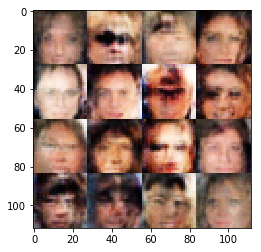

Epoch 1/1... Generator Loss: 0.7303 Discriminator Loss: 1.2480...
Epoch 1/1... Generator Loss: 0.9937 Discriminator Loss: 1.4626...
Epoch 1/1... Generator Loss: 0.8887 Discriminator Loss: 1.1657...
Epoch 1/1... Generator Loss: 0.8290 Discriminator Loss: 1.1701...
Epoch 1/1... Generator Loss: 0.8858 Discriminator Loss: 1.3396...
Epoch 1/1... Generator Loss: 0.7217 Discriminator Loss: 1.4009...
Epoch 1/1... Generator Loss: 1.0318 Discriminator Loss: 1.2291...
Epoch 1/1... Generator Loss: 0.7396 Discriminator Loss: 1.3836...
Epoch 1/1... Generator Loss: 1.1251 Discriminator Loss: 1.3600...
Epoch 1/1... Generator Loss: 1.1613 Discriminator Loss: 1.4391...


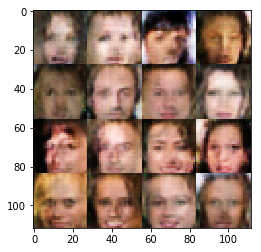

Epoch 1/1... Generator Loss: 0.8365 Discriminator Loss: 1.2784...
Epoch 1/1... Generator Loss: 0.7273 Discriminator Loss: 1.3635...
Epoch 1/1... Generator Loss: 1.0577 Discriminator Loss: 1.1747...
Epoch 1/1... Generator Loss: 0.9713 Discriminator Loss: 1.2986...
Epoch 1/1... Generator Loss: 0.8700 Discriminator Loss: 1.3977...
Epoch 1/1... Generator Loss: 0.6814 Discriminator Loss: 1.4005...
Epoch 1/1... Generator Loss: 0.7369 Discriminator Loss: 1.2582...
Epoch 1/1... Generator Loss: 0.7108 Discriminator Loss: 1.4031...
Epoch 1/1... Generator Loss: 0.8076 Discriminator Loss: 1.3128...
Epoch 1/1... Generator Loss: 0.7464 Discriminator Loss: 1.2817...


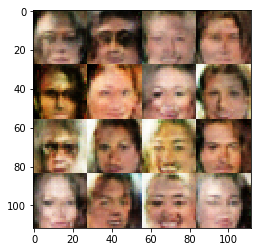

Epoch 1/1... Generator Loss: 1.0246 Discriminator Loss: 1.1795...
Epoch 1/1... Generator Loss: 1.1177 Discriminator Loss: 1.3666...
Epoch 1/1... Generator Loss: 0.9387 Discriminator Loss: 1.2404...
Epoch 1/1... Generator Loss: 0.7170 Discriminator Loss: 1.2969...
Epoch 1/1... Generator Loss: 0.6321 Discriminator Loss: 1.2736...
Epoch 1/1... Generator Loss: 0.8579 Discriminator Loss: 1.3100...
Epoch 1/1... Generator Loss: 0.7382 Discriminator Loss: 1.4249...
Epoch 1/1... Generator Loss: 0.7392 Discriminator Loss: 1.2304...
Epoch 1/1... Generator Loss: 1.0740 Discriminator Loss: 1.3309...
Epoch 1/1... Generator Loss: 0.8537 Discriminator Loss: 1.4092...


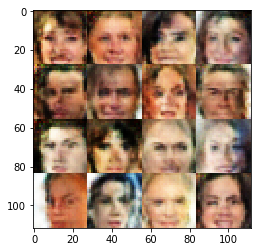

Epoch 1/1... Generator Loss: 0.8705 Discriminator Loss: 1.3353...
Epoch 1/1... Generator Loss: 0.7078 Discriminator Loss: 1.4015...
Epoch 1/1... Generator Loss: 0.8451 Discriminator Loss: 1.2993...
Epoch 1/1... Generator Loss: 0.7003 Discriminator Loss: 1.3863...
Epoch 1/1... Generator Loss: 0.6840 Discriminator Loss: 1.2500...
Epoch 1/1... Generator Loss: 0.7628 Discriminator Loss: 1.3524...
Epoch 1/1... Generator Loss: 0.9446 Discriminator Loss: 1.3689...
Epoch 1/1... Generator Loss: 0.7507 Discriminator Loss: 1.2933...
Epoch 1/1... Generator Loss: 0.8163 Discriminator Loss: 1.2946...
Epoch 1/1... Generator Loss: 0.7336 Discriminator Loss: 1.3460...


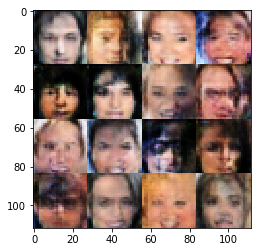

Epoch 1/1... Generator Loss: 0.8479 Discriminator Loss: 1.2851...
Epoch 1/1... Generator Loss: 0.9974 Discriminator Loss: 1.2297...
Epoch 1/1... Generator Loss: 0.9499 Discriminator Loss: 1.2305...
Epoch 1/1... Generator Loss: 1.1035 Discriminator Loss: 1.1932...
Epoch 1/1... Generator Loss: 0.7094 Discriminator Loss: 1.3905...
Epoch 1/1... Generator Loss: 0.5724 Discriminator Loss: 1.3492...
Epoch 1/1... Generator Loss: 0.6734 Discriminator Loss: 1.5518...
Epoch 1/1... Generator Loss: 0.7665 Discriminator Loss: 1.3497...
Epoch 1/1... Generator Loss: 0.7838 Discriminator Loss: 1.2708...
Epoch 1/1... Generator Loss: 0.8159 Discriminator Loss: 1.3599...


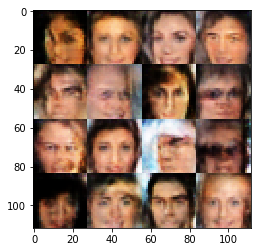

Epoch 1/1... Generator Loss: 0.7875 Discriminator Loss: 1.3344...
Epoch 1/1... Generator Loss: 1.0111 Discriminator Loss: 1.4852...
Epoch 1/1... Generator Loss: 0.6285 Discriminator Loss: 1.3886...
Epoch 1/1... Generator Loss: 0.7589 Discriminator Loss: 1.3848...
Epoch 1/1... Generator Loss: 0.6022 Discriminator Loss: 1.3159...
Epoch 1/1... Generator Loss: 0.8685 Discriminator Loss: 1.3556...
Epoch 1/1... Generator Loss: 0.7421 Discriminator Loss: 1.4583...
Epoch 1/1... Generator Loss: 0.7697 Discriminator Loss: 1.3161...
Epoch 1/1... Generator Loss: 0.7396 Discriminator Loss: 1.3808...
Epoch 1/1... Generator Loss: 0.8518 Discriminator Loss: 1.1641...


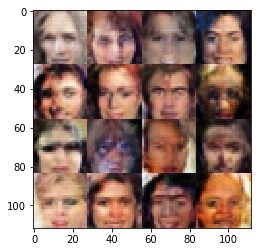

Epoch 1/1... Generator Loss: 0.7752 Discriminator Loss: 1.2594...
Epoch 1/1... Generator Loss: 0.8314 Discriminator Loss: 1.2483...
Epoch 1/1... Generator Loss: 1.0908 Discriminator Loss: 1.3849...
Epoch 1/1... Generator Loss: 0.9295 Discriminator Loss: 1.2575...
Epoch 1/1... Generator Loss: 0.9279 Discriminator Loss: 1.3075...
Epoch 1/1... Generator Loss: 0.6711 Discriminator Loss: 1.3375...
Epoch 1/1... Generator Loss: 0.7439 Discriminator Loss: 1.2642...
Epoch 1/1... Generator Loss: 0.8065 Discriminator Loss: 1.2523...
Epoch 1/1... Generator Loss: 0.8840 Discriminator Loss: 1.2711...
Epoch 1/1... Generator Loss: 0.8827 Discriminator Loss: 1.1731...


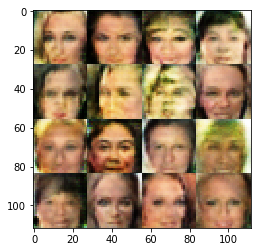

Epoch 1/1... Generator Loss: 0.8250 Discriminator Loss: 1.4363...
Epoch 1/1... Generator Loss: 0.6198 Discriminator Loss: 1.4340...
Epoch 1/1... Generator Loss: 0.7026 Discriminator Loss: 1.4129...
Epoch 1/1... Generator Loss: 0.7756 Discriminator Loss: 1.3143...
Epoch 1/1... Generator Loss: 0.8281 Discriminator Loss: 1.3770...
Epoch 1/1... Generator Loss: 0.9835 Discriminator Loss: 1.2854...
Epoch 1/1... Generator Loss: 0.6506 Discriminator Loss: 1.4464...
Epoch 1/1... Generator Loss: 0.7964 Discriminator Loss: 1.2824...
Epoch 1/1... Generator Loss: 0.9411 Discriminator Loss: 1.2935...
Epoch 1/1... Generator Loss: 0.8396 Discriminator Loss: 1.4617...


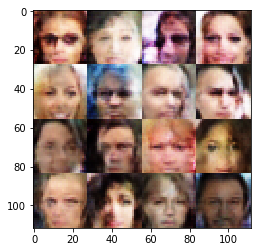

Epoch 1/1... Generator Loss: 0.7453 Discriminator Loss: 1.3716...
Epoch 1/1... Generator Loss: 0.6169 Discriminator Loss: 1.3612...
Epoch 1/1... Generator Loss: 0.6534 Discriminator Loss: 1.4559...
Epoch 1/1... Generator Loss: 0.9679 Discriminator Loss: 1.1763...
Epoch 1/1... Generator Loss: 0.7966 Discriminator Loss: 1.3840...
Epoch 1/1... Generator Loss: 0.7368 Discriminator Loss: 1.2618...
Epoch 1/1... Generator Loss: 0.4898 Discriminator Loss: 1.5321...
Epoch 1/1... Generator Loss: 0.8572 Discriminator Loss: 1.2683...
Epoch 1/1... Generator Loss: 0.8189 Discriminator Loss: 1.3396...
Epoch 1/1... Generator Loss: 1.0807 Discriminator Loss: 1.3178...


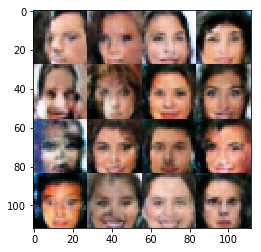

Epoch 1/1... Generator Loss: 0.8273 Discriminator Loss: 1.3171...
Epoch 1/1... Generator Loss: 0.7405 Discriminator Loss: 1.2955...
Epoch 1/1... Generator Loss: 1.0164 Discriminator Loss: 1.2960...
Epoch 1/1... Generator Loss: 0.8286 Discriminator Loss: 1.2500...
Epoch 1/1... Generator Loss: 1.0193 Discriminator Loss: 1.1879...
Epoch 1/1... Generator Loss: 0.6700 Discriminator Loss: 1.4861...
Epoch 1/1... Generator Loss: 0.9445 Discriminator Loss: 1.2392...
Epoch 1/1... Generator Loss: 0.9286 Discriminator Loss: 1.2577...
Epoch 1/1... Generator Loss: 0.6205 Discriminator Loss: 1.4060...
Epoch 1/1... Generator Loss: 0.7809 Discriminator Loss: 1.2840...


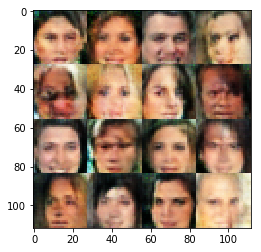

Epoch 1/1... Generator Loss: 0.7185 Discriminator Loss: 1.3377...
Epoch 1/1... Generator Loss: 0.7773 Discriminator Loss: 1.2739...
Epoch 1/1... Generator Loss: 0.7439 Discriminator Loss: 1.3644...
Epoch 1/1... Generator Loss: 0.7701 Discriminator Loss: 1.3210...
Epoch 1/1... Generator Loss: 0.8139 Discriminator Loss: 1.2564...
Epoch 1/1... Generator Loss: 0.6523 Discriminator Loss: 1.3775...
Epoch 1/1... Generator Loss: 0.8138 Discriminator Loss: 1.2676...
Epoch 1/1... Generator Loss: 0.8634 Discriminator Loss: 1.2895...
Epoch 1/1... Generator Loss: 0.6619 Discriminator Loss: 1.4249...
Epoch 1/1... Generator Loss: 0.8347 Discriminator Loss: 1.3051...


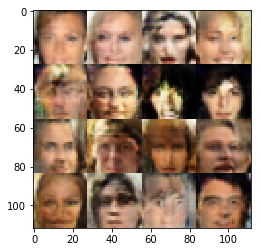

Epoch 1/1... Generator Loss: 0.7321 Discriminator Loss: 1.3555...
Epoch 1/1... Generator Loss: 1.1226 Discriminator Loss: 1.2226...
Epoch 1/1... Generator Loss: 1.0231 Discriminator Loss: 1.3305...
Epoch 1/1... Generator Loss: 0.7783 Discriminator Loss: 1.2581...
Epoch 1/1... Generator Loss: 0.7602 Discriminator Loss: 1.4258...
Epoch 1/1... Generator Loss: 0.7774 Discriminator Loss: 1.3468...
Epoch 1/1... Generator Loss: 0.9201 Discriminator Loss: 1.4008...
Epoch 1/1... Generator Loss: 1.0209 Discriminator Loss: 1.3343...
Epoch 1/1... Generator Loss: 0.9416 Discriminator Loss: 1.2008...
Epoch 1/1... Generator Loss: 0.8322 Discriminator Loss: 1.1890...


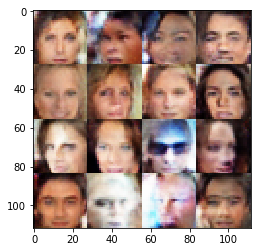

Epoch 1/1... Generator Loss: 0.8934 Discriminator Loss: 1.2461...
Epoch 1/1... Generator Loss: 0.9406 Discriminator Loss: 1.2629...
Epoch 1/1... Generator Loss: 0.6583 Discriminator Loss: 1.4469...
Epoch 1/1... Generator Loss: 0.6749 Discriminator Loss: 1.4239...
Epoch 1/1... Generator Loss: 0.8169 Discriminator Loss: 1.2590...
Epoch 1/1... Generator Loss: 1.0835 Discriminator Loss: 1.3094...
Epoch 1/1... Generator Loss: 0.7666 Discriminator Loss: 1.3771...
Epoch 1/1... Generator Loss: 0.7924 Discriminator Loss: 1.4245...
Epoch 1/1... Generator Loss: 0.8325 Discriminator Loss: 1.3329...
Epoch 1/1... Generator Loss: 0.7493 Discriminator Loss: 1.3501...


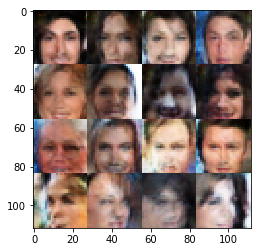

Epoch 1/1... Generator Loss: 0.7537 Discriminator Loss: 1.3508...
Epoch 1/1... Generator Loss: 0.6642 Discriminator Loss: 1.3174...
Epoch 1/1... Generator Loss: 0.9002 Discriminator Loss: 1.4142...
Epoch 1/1... Generator Loss: 0.8731 Discriminator Loss: 1.3966...
Epoch 1/1... Generator Loss: 1.0321 Discriminator Loss: 1.3029...
Epoch 1/1... Generator Loss: 0.7967 Discriminator Loss: 1.3058...
Epoch 1/1... Generator Loss: 0.7545 Discriminator Loss: 1.3390...
Epoch 1/1... Generator Loss: 0.9113 Discriminator Loss: 1.3097...
Epoch 1/1... Generator Loss: 0.9305 Discriminator Loss: 1.2128...
Epoch 1/1... Generator Loss: 0.6107 Discriminator Loss: 1.4665...


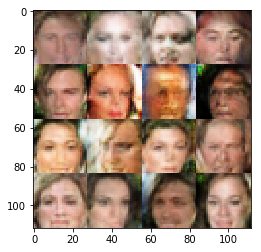

Epoch 1/1... Generator Loss: 1.0222 Discriminator Loss: 1.2451...
Epoch 1/1... Generator Loss: 0.7847 Discriminator Loss: 1.3379...
Epoch 1/1... Generator Loss: 0.8998 Discriminator Loss: 1.2835...
Epoch 1/1... Generator Loss: 0.8017 Discriminator Loss: 1.2714...
Epoch 1/1... Generator Loss: 0.8015 Discriminator Loss: 1.4337...
Epoch 1/1... Generator Loss: 0.7713 Discriminator Loss: 1.3609...
Epoch 1/1... Generator Loss: 0.8449 Discriminator Loss: 1.3668...
Epoch 1/1... Generator Loss: 0.7340 Discriminator Loss: 1.3828...
Epoch 1/1... Generator Loss: 0.8389 Discriminator Loss: 1.3953...
Epoch 1/1... Generator Loss: 0.6105 Discriminator Loss: 1.4354...


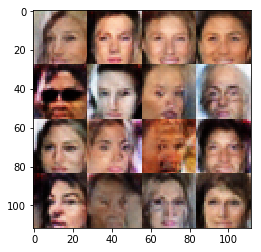

Epoch 1/1... Generator Loss: 0.7668 Discriminator Loss: 1.4010...
Epoch 1/1... Generator Loss: 0.7639 Discriminator Loss: 1.4699...
Epoch 1/1... Generator Loss: 0.7401 Discriminator Loss: 1.2700...
Epoch 1/1... Generator Loss: 0.7571 Discriminator Loss: 1.3462...
Epoch 1/1... Generator Loss: 0.8465 Discriminator Loss: 1.3342...
Epoch 1/1... Generator Loss: 0.8433 Discriminator Loss: 1.3388...
Epoch 1/1... Generator Loss: 0.8579 Discriminator Loss: 1.2832...
Epoch 1/1... Generator Loss: 0.6962 Discriminator Loss: 1.3443...
Epoch 1/1... Generator Loss: 0.6929 Discriminator Loss: 1.3503...
Epoch 1/1... Generator Loss: 0.8168 Discriminator Loss: 1.3579...


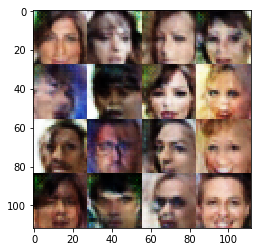

Epoch 1/1... Generator Loss: 0.8530 Discriminator Loss: 1.3521...
Epoch 1/1... Generator Loss: 0.6328 Discriminator Loss: 1.3517...
Epoch 1/1... Generator Loss: 1.0038 Discriminator Loss: 1.3017...
Epoch 1/1... Generator Loss: 1.0632 Discriminator Loss: 1.1141...
Epoch 1/1... Generator Loss: 0.6691 Discriminator Loss: 1.3548...
Epoch 1/1... Generator Loss: 0.8067 Discriminator Loss: 1.3852...
Epoch 1/1... Generator Loss: 0.8365 Discriminator Loss: 1.3921...
Epoch 1/1... Generator Loss: 0.8356 Discriminator Loss: 1.3226...
Epoch 1/1... Generator Loss: 0.7493 Discriminator Loss: 1.3808...
Epoch 1/1... Generator Loss: 0.8365 Discriminator Loss: 1.2903...


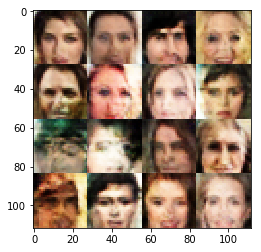

Epoch 1/1... Generator Loss: 0.7636 Discriminator Loss: 1.3565...
Epoch 1/1... Generator Loss: 0.7894 Discriminator Loss: 1.3798...
Epoch 1/1... Generator Loss: 0.9528 Discriminator Loss: 1.2870...
Epoch 1/1... Generator Loss: 0.8565 Discriminator Loss: 1.3425...
Epoch 1/1... Generator Loss: 0.9329 Discriminator Loss: 1.2515...
Epoch 1/1... Generator Loss: 1.1424 Discriminator Loss: 1.1800...
Epoch 1/1... Generator Loss: 0.7789 Discriminator Loss: 1.2697...
Epoch 1/1... Generator Loss: 1.0044 Discriminator Loss: 1.1837...
Epoch 1/1... Generator Loss: 0.5107 Discriminator Loss: 1.5956...
Epoch 1/1... Generator Loss: 0.7904 Discriminator Loss: 1.3526...


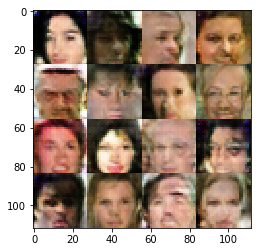

Epoch 1/1... Generator Loss: 0.6777 Discriminator Loss: 1.3193...
Epoch 1/1... Generator Loss: 0.8548 Discriminator Loss: 1.2065...
Epoch 1/1... Generator Loss: 0.6782 Discriminator Loss: 1.3609...
Epoch 1/1... Generator Loss: 0.8820 Discriminator Loss: 1.3068...
Epoch 1/1... Generator Loss: 0.9454 Discriminator Loss: 1.2919...
Epoch 1/1... Generator Loss: 0.9230 Discriminator Loss: 1.1872...
Epoch 1/1... Generator Loss: 0.7199 Discriminator Loss: 1.2601...
Epoch 1/1... Generator Loss: 1.0433 Discriminator Loss: 1.3513...
Epoch 1/1... Generator Loss: 0.7857 Discriminator Loss: 1.3595...
Epoch 1/1... Generator Loss: 0.5745 Discriminator Loss: 1.4077...


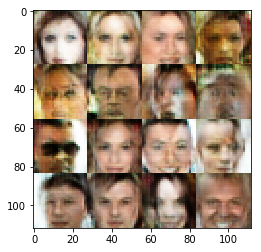

Epoch 1/1... Generator Loss: 0.8848 Discriminator Loss: 1.2181...
Epoch 1/1... Generator Loss: 0.6934 Discriminator Loss: 1.3391...
Epoch 1/1... Generator Loss: 0.6681 Discriminator Loss: 1.4802...
Epoch 1/1... Generator Loss: 0.8285 Discriminator Loss: 1.4126...
Epoch 1/1... Generator Loss: 0.6866 Discriminator Loss: 1.3396...
Epoch 1/1... Generator Loss: 0.6464 Discriminator Loss: 1.4839...
Epoch 1/1... Generator Loss: 0.8729 Discriminator Loss: 1.2000...
Epoch 1/1... Generator Loss: 0.9062 Discriminator Loss: 1.1889...
Epoch 1/1... Generator Loss: 0.7459 Discriminator Loss: 1.2866...
Epoch 1/1... Generator Loss: 0.6204 Discriminator Loss: 1.3908...


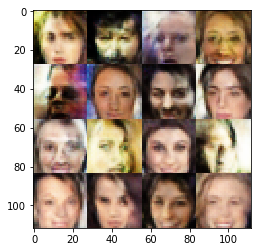

Epoch 1/1... Generator Loss: 0.7330 Discriminator Loss: 1.2674...
Epoch 1/1... Generator Loss: 0.7074 Discriminator Loss: 1.3739...
Epoch 1/1... Generator Loss: 0.9484 Discriminator Loss: 1.2925...
Epoch 1/1... Generator Loss: 0.8757 Discriminator Loss: 1.3421...
Epoch 1/1... Generator Loss: 0.6903 Discriminator Loss: 1.3974...
Epoch 1/1... Generator Loss: 0.5329 Discriminator Loss: 1.4708...


In [36]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.